# Course: ICS 574
# Subject: Alchemists Project

In [13]:
# import pandas libraries and import the dataset

import pandas as pd

stocks_df = pd.read_csv("./datasets/Tadawul_stcks.csv")
brent_df = pd.read_csv("./datasets/BrentOilPrices.csv")
eth_df = pd.read_csv("./datasets/coin_Ethereum.csv")
gold_df = pd.read_csv("./datasets/Gold_Daily.csv")

stocks_df.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0


In [7]:
# identify stocks dataset types
stocks_df.dtypes

symbol              int64
name               object
trading_name       object
sectoer            object
date               object
open              float64
high              float64
low               float64
close             float64
change            float64
perc_Change       float64
volume_traded     float64
value_traded      float64
no_trades         float64
dtype: object

In [11]:
# change stocks date from String to Date
stocks_df['date'] = pd.to_datetime(stocks_df['date'])

In [12]:
# verify stocks dataset date type change
stocks_df.dtypes

symbol                     int64
name                      object
trading_name              object
sectoer                   object
date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
change                   float64
perc_Change              float64
volume_traded            float64
value_traded             float64
no_trades                float64
dtype: object

In [8]:
# identify brent dataset types
brent_df.dtypes

Date      object
Price    float64
dtype: object

In [14]:
# change brent date from String to Date
brent_df['Date'] = pd.to_datetime(brent_df['Date'])

C:\Users\Banda\AppData\Local\Temp\ipykernel_17884\2640482991.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_df['Date'] = pd.to_datetime(brent_df['Date'])


In [15]:
# verify brent dataset types
brent_df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [9]:
# identify dataset types
gold_df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol          object
Change %    float64
dtype: object

In [3]:
# change date from String to Date

df['date'] = pd.to_datetime(df['date'])


In [4]:
# verify now month is datetime type
df.dtypes

symbol                     int64
name                      object
trading_name              object
sectoer                   object
date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
change                   float64
perc_Change              float64
volume_traded            float64
value_traded             float64
no_trades                float64
dtype: object

In [5]:
# set the date as the df index
df.set_index('date', inplace=True)

In [7]:
df.head()

,symbol,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
date,,,,,,,,,,,,,
2020-03-05,2030,Saudi Arabia Refineries Co.,SARCO,Energy,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0
2020-03-04,2030,Saudi Arabia Refineries Co.,SARCO,Energy,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0
2020-03-03,2030,Saudi Arabia Refineries Co.,SARCO,Energy,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0
2020-03-02,2030,Saudi Arabia Refineries Co.,SARCO,Energy,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0
2020-03-01,2030,Saudi Arabia Refineries Co.,SARCO,Energy,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0


In [14]:
# set index of df to be month
df = df.set_index('date')


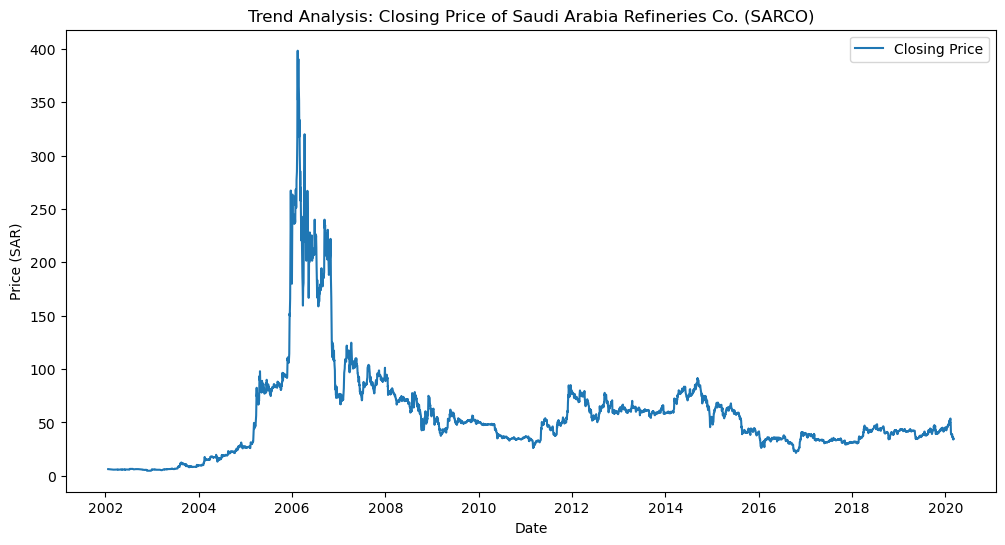

In [9]:
# selecting specific stock to examine
sample_stock = df[df['symbol'] == 2030]

# Plotting closing price trend
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(sample_stock.index, sample_stock['close'], label='Closing Price')
plt.title('Trend Analysis: Closing Price of Saudi Arabia Refineries Co. (SARCO)')
plt.xlabel('Date')
plt.ylabel('Price (SAR)')
plt.legend()
plt.show()


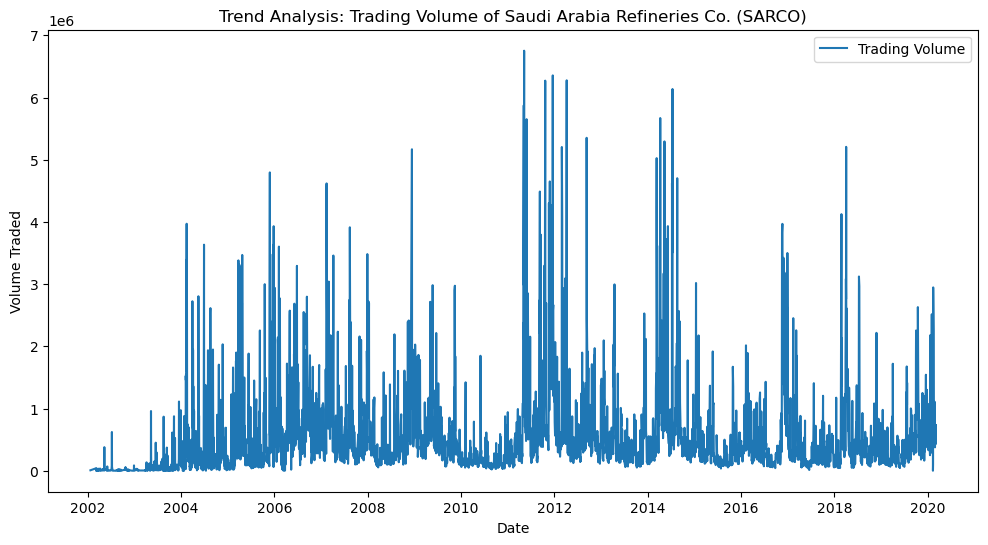

In [10]:
# Plotting trading volume trend
plt.figure(figsize=(12, 6))
plt.plot(sample_stock.index, sample_stock['volume_traded '], label='Trading Volume')
plt.title('Trend Analysis: Trading Volume of Saudi Arabia Refineries Co. (SARCO)')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.legend()
plt.show()

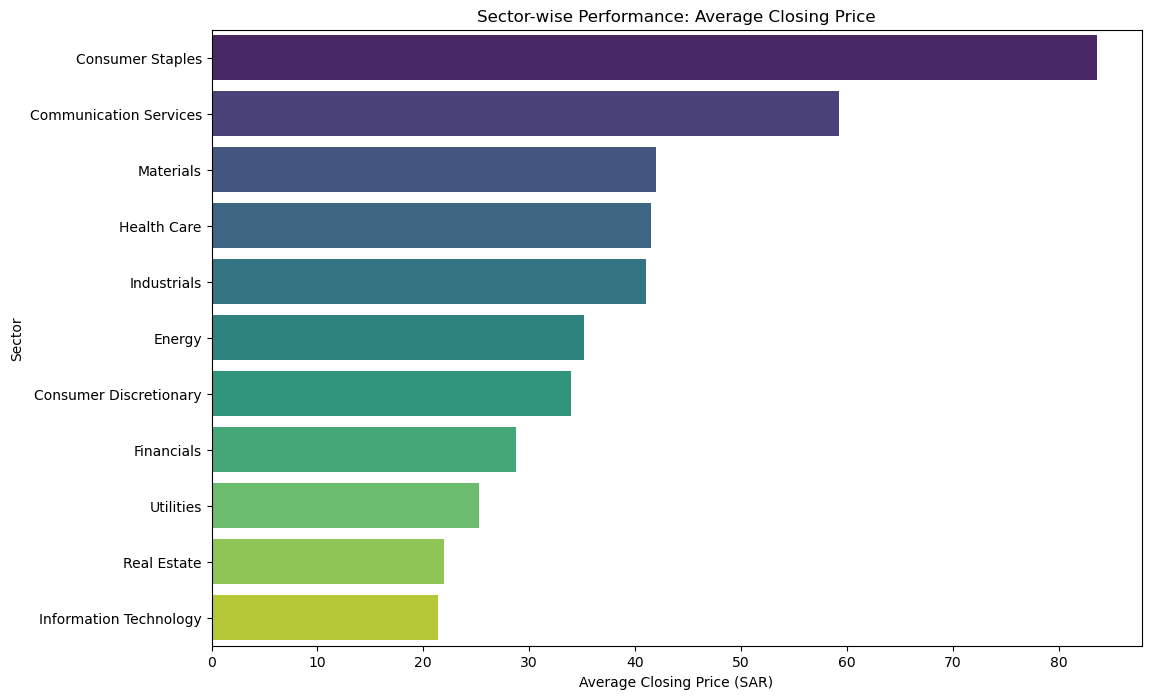

In [11]:
# Grouping the data by sector and calculating the average closing price
sector_performance = df.groupby('sectoer')['close'].mean().sort_values(ascending=False)

# Plotting the sector-wise performance
plt.figure(figsize=(12, 8))
sns.barplot(x=sector_performance.values, y=sector_performance.index, palette='viridis')
plt.title('Sector-wise Performance: Average Closing Price')
plt.xlabel('Average Closing Price (SAR)')
plt.ylabel('Sector')
plt.show()

In [15]:
# show now again after indexing by month - not by row number
df.head()

,symbol,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
date,,,,,,,,,,,,,
2020-03-05,2030,Saudi Arabia Refineries Co.,SARCO,Energy,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0
2020-03-04,2030,Saudi Arabia Refineries Co.,SARCO,Energy,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0
2020-03-03,2030,Saudi Arabia Refineries Co.,SARCO,Energy,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0
2020-03-02,2030,Saudi Arabia Refineries Co.,SARCO,Energy,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0
2020-03-01,2030,Saudi Arabia Refineries Co.,SARCO,Energy,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0


<Axes: xlabel='date'>

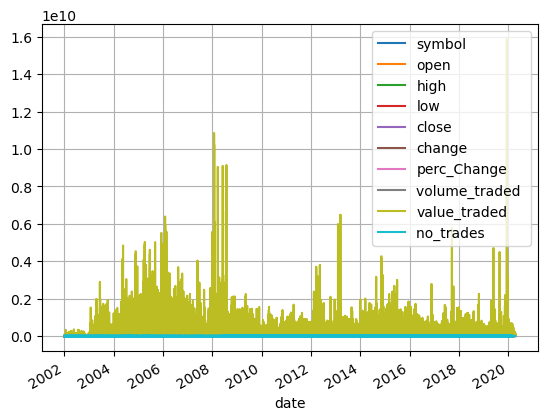

In [16]:
# plot time series; notice the peaks
df.plot(grid='on')

<Axes: xlabel='date'>

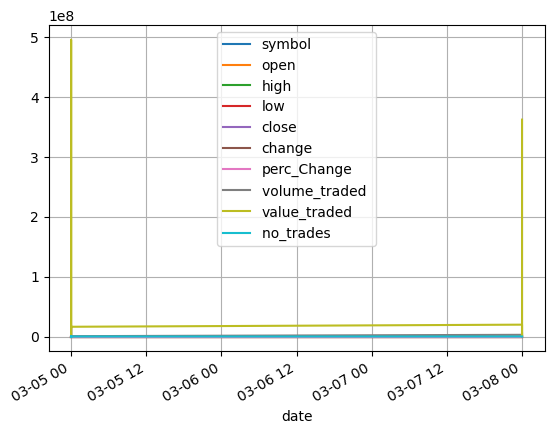

In [23]:
# zoom in to a specific date
shortData = df['3/5/20':'3/8/20']
shortData.plot(grid='on')

In [21]:
# descriptive statistics - not clear how useful this is for time series?
df.describe()

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
count,593819.000000,587364.000000,587122.000000,587122.000000,593819.000000,593819.000000,593819.000000,5.938190e+05,5.938190e+05,586128.000000
mean,3952.684793,41.237794,41.971636,40.593406,40.961602,0.001174,0.035652,1.673422e+06,5.008553e+07,960.642348
std,2284.498530,86.713646,89.178183,84.562283,86.491709,4.782545,3.480783,5.482121e+06,1.472969e+08,3401.794136
min,1010.000000,1.950000,1.950000,1.950000,0.000000,-681.200000,-100.000000,0.000000e+00,0.000000e+00,0.000000
25%,2140.000000,16.200000,16.400000,16.000000,16.070000,-0.250000,-0.910000,1.484920e+05,4.114858e+06,158.000000
50%,4004.000000,26.500000,26.905000,26.100000,26.300000,0.000000,0.000000,4.335560e+05,1.210533e+07,376.000000
75%,5110.000000,46.500000,47.200000,45.850000,46.200000,0.250000,0.910000,1.271184e+06,3.561017e+07,900.000000
max,8312.000000,6709.150000,6774.510000,6130.720000,6441.180000,578.430000,1634.440000,7.976659e+08,1.586582e+10,816526.000000


In [22]:
# describe for a specific period of time
df['3/5/20':'3/8/20'].describe()

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
count,200.00000,195.000000,195.000000,195.000000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,198.000000
mean,4085.98000,28.514769,28.835282,28.019744,27.869000,-0.192050,-0.611000,7.803249e+05,1.928110e+07,837.696970
std,2260.25919,25.338357,25.511672,24.930859,24.823278,0.824859,2.454623,1.533734e+06,4.949522e+07,996.011523
min,1010.00000,7.080000,7.080000,6.920000,5.390000,-7.800000,-10.000000,0.000000e+00,0.000000e+00,0.000000
25%,2197.50000,12.180000,12.350000,11.910000,11.920000,-0.265000,-1.405000,1.470922e+05,3.094718e+06,315.000000
50%,4035.50000,18.380000,19.000000,18.000000,18.020000,-0.080000,-0.540000,3.291220e+05,6.940541e+06,534.000000
75%,4347.25000,34.550000,35.075000,33.900000,33.425000,0.050000,0.252500,7.536522e+05,1.755279e+07,939.250000
max,8312.00000,155.000000,155.000000,153.000000,153.000000,2.960000,9.860000,1.542502e+07,4.954567e+08,8801.000000


In [24]:
# resample date to represent it per year instead of month
df.resample('Y').sum()

,symbol,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
date,,,,,,,,,,,,,
2001-12-31,143651,National Shipping Company of Saudi ArabiaSaudi...,BAHRISABICSAFCOTASNEENGCZOUJAJALUJAINNAMA CHEM...,EnergyMaterialsMaterialsMaterialsMaterialsMate...,878.13,879.26,871.01,878.23,-2394.27,-168.87,1.680882e+07,2.097634e+08,1467.0
2002-12-31,49805852,National Shipping Company of Saudi ArabiaSaudi...,BAHRISABICSAFCOTASNEENGCALUJAINNAMA CHEMICALSM...,EnergyMaterialsMaterialsMaterialsMaterialsMate...,312639.83,312190.16,306759.37,319003.86,335.34,1660.15,1.250776e+10,1.249448e+11,955360.0
2003-12-31,57143110,National Shipping Company of Saudi ArabiaSaudi...,BAHRISABICSAFCOTASNEENGCZOUJAJALUJAINNAMA CHEM...,EnergyMaterialsMaterialsMaterialsMaterialsMate...,459626.66,466014.54,453772.13,466192.76,892.40,3870.62,3.706500e+10,5.931288e+11,3692940.0
2004-12-31,63839169,Saudi Arabia Refineries Co.National Shipping C...,SARCOBAHRISABICSAFCOTASNEENGCZOUJAJALUJAINFIPC...,EnergyEnergyMaterialsMaterialsMaterialsMateria...,1022451.37,1039831.78,1007286.95,1026049.99,1927.70,4798.79,6.241115e+10,1.727193e+12,12676275.0
2005-12-31,69367839,Saudi Arabia Refineries Co.National Shipping C...,SARCOBAHRISABICSAFCOTASNEENGCZOUJAJALUJAINFIPC...,EnergyEnergyMaterialsMaterialsMaterialsMateria...,1740661.16,1775828.50,1709211.22,1744172.71,5292.39,8061.72,7.543659e+10,4.020394e+12,44226919.0
2006-12-31,65458276,Saudi Arabia Refineries Co.National Shipping C...,SARCOBAHRISABICSAFCOTASNEENGCZOUJAJALUJAINFIPC...,EnergyEnergyMaterialsMaterialsMaterialsMateria...,2366103.99,2452131.58,2293647.50,2374813.11,-4185.46,-3844.08,7.985714e+10,5.061548e+12,89918405.0
2007-12-31,80124688,Saudi Arabia Refineries Co.National Shipping C...,SARCOBAHRIALDREESSABICSAFCOTASNEENGCZOUJAJALUJ...,EnergyEnergyEnergyMaterialsMaterialsMaterialsM...,1156376.41,1184875.77,1130354.44,1157574.57,2275.86,4202.82,6.830346e+10,2.473153e+12,62323043.0
2008-12-31,115134295,Saudi Arabia Refineries Co.National Shipping C...,SARCOBAHRIALDREESSABICSAFCOTASNEENGCZOUJAJALUJ...,EnergyEnergyEnergyMaterialsMaterialsMaterialsM...,1273042.84,1300644.80,1246133.66,1271867.95,-4530.44,-8863.45,6.364361e+10,1.911575e+12,46226896.0
2009-12-31,125542172,Saudi Arabia Refineries Co.Rabigh Refining and...,SARCOPETRO RABIGHBAHRIALDREESBCIMAADENCHEMANOL...,EnergyEnergyEnergyEnergyMaterialsMaterialsMate...,1014671.82,1033288.67,998005.78,1014921.82,1435.98,5256.25,5.886467e+10,1.222969e+12,33188086.0


In [ ]:
sns.scatterplot(data=df, x='date', y='sector')

<Axes: xlabel='Month'>

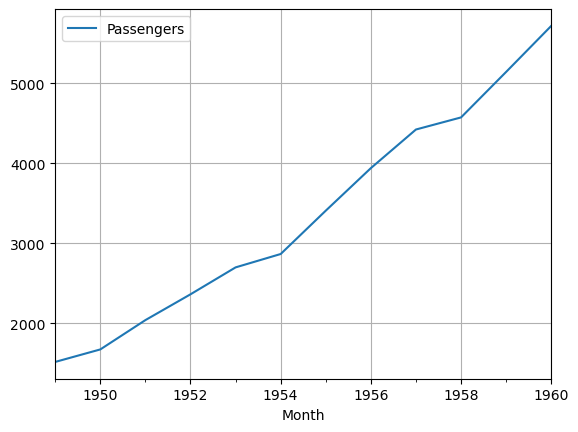

In [15]:
# plot the resampled version; notice it's showing the overall positive trend, but not the seasonal spikes we observed in previous plots
df.resample('Y').sum().plot(grid='on')

In [16]:
# importing the sales data 

import pandas as pd

df = pd.read_csv("../Datasets/SalesData.csv")
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


In [17]:
# update index to be month number
df = df.set_index('month_number')

df = df.set_index('Month')

<Axes: xlabel='month_number'>

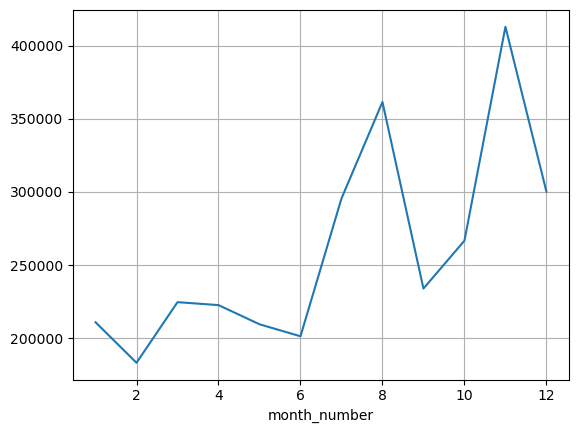

In [18]:
# Plot the total profit of all months as a line plot.
df['total_profit'].plot(grid='on')

<Axes: xlabel='month_number'>

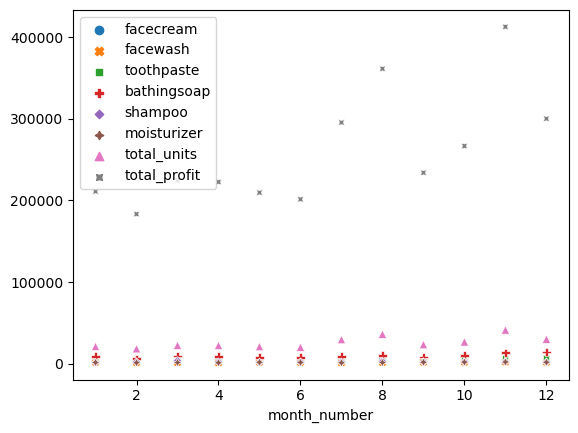

In [25]:
# display the number of units sold per month for each product using multiline plots 
# attempted with seaborn scatter plot
import seaborn as sns
sns.scatterplot(data=df)

<Axes: xlabel='month_number'>

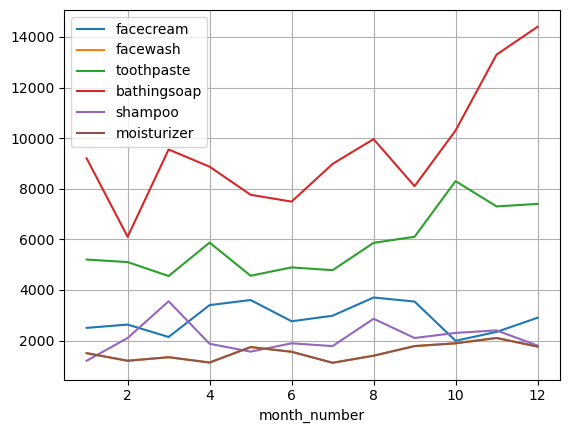

In [ ]:
# better way to show number of units sold per month for each product using multiline plots 
df.iloc[:,0:6].plot(grid='on')

<Axes: xlabel='month_number', ylabel='toothpaste'>

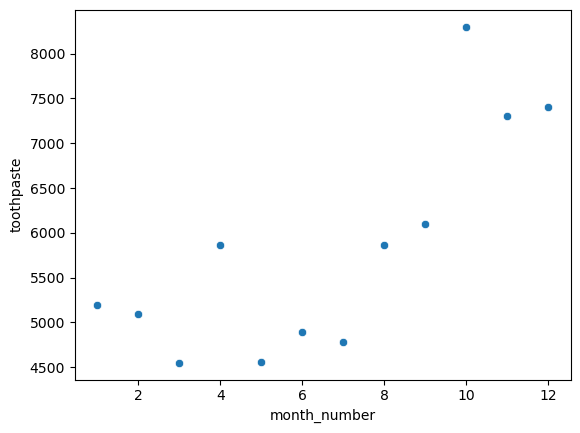

In [ ]:
# Scatter plot of the toothpaste sales data of each month
sns.scatterplot(data=df, x='month_number', y='toothpaste')

<Axes: xlabel='month_number'>

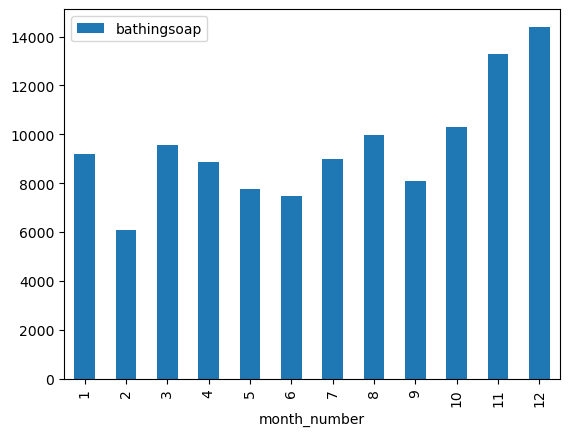

In [ ]:
# Study the bathing soap sales data by plotting a bar chart
df.plot(kind='bar', y='bathingsoap')

<Axes: xlabel='month_number'>

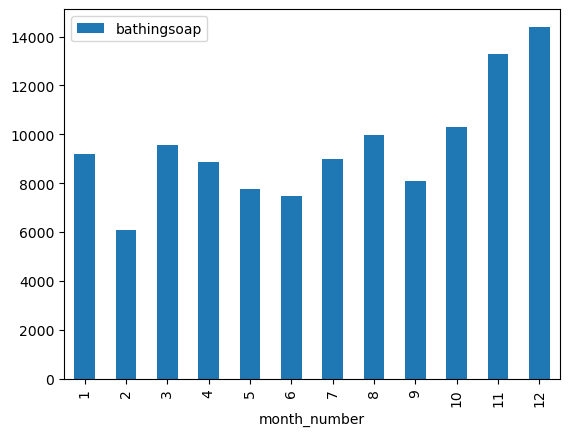

In [ ]:
# another way to plot the bar chart
df.plot.bar(y='bathingsoap')

<Axes: >

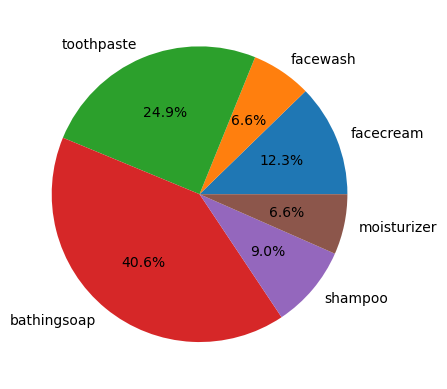

In [23]:
# Pie Char showing the year sale percentage for each product
# this will first sum the sales for each product, then plot the pie chart
product_sales = df[['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']].sum()
product_sales.plot.pie(autopct='%1.1f%%')

<Axes: >

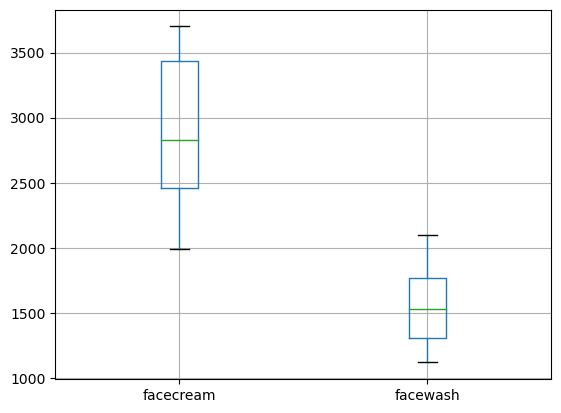

In [ ]:
# box plot
df.boxplot(column=['facecream', 'facewash'])